In [90]:
import pandas as pd
import numpy as np

df_atp = pd.read_csv("archive/atp_data.csv")
df_conf = pd.read_csv("archive/confidence_data.csv")
df_atp["ATP"].min()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_atp["Date"] = pd.to_datetime(df_atp["Date"])

In [94]:
df_atp.sort_values("proba_elo", inplace=True)
df_atp.head(10)

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,Wsets,Lsets,Comment,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
39725,23,Monte Carlo,Monte Carlo Masters,2016-04-13,Masters 1000,Outdoor,Clay,2nd Round,3,Vesely J.,Djokovic N.,55,1,2.0,1.0,Completed,24.52,1.020,23.0,1.010,1564.862585,2383.577360,0.008899
36222,3,Doha,Qatar Exxon Mobil Open,2015-01-06,ATP250,Outdoor,Hard,1st Round,3,Berrer M.,Nadal R.,127,3,2.0,1.0,Completed,10.91,1.070,10.0,1.060,1517.856231,2286.165039,0.011859
41697,6,Melbourne,Australian Open,2017-01-19,Grand Slam,Outdoor,Hard,2nd Round,5,Istomin D.,Djokovic N.,117,2,3.0,2.0,Completed,27.22,1.010,23.0,1.010,1553.173812,2291.197754,0.014086
35112,37,London,Wimbledon,2013-06-24,Grand Slam,Outdoor,Grass,1st Round,5,Darcis S.,Nadal R.,135,5,3.0,0.0,Completed,34.00,1.010,29.0,1.002,1581.400588,2305.718091,0.015225
40461,39,London,Wimbledon,2016-07-02,Grand Slam,Outdoor,Grass,3rd Round,5,Querrey S.,Djokovic N.,41,1,3.0,1.0,Completed,31.30,1.010,26.0,1.010,1685.411193,2367.959456,0.019283
39427,17,Dubai,Dubai Tennis Championships,2016-02-25,ATP500,Outdoor,Hard,Quarterfinals,3,Lopez F.,Djokovic N.,24,1,1.0,0.0,Retired,25.50,1.020,17.0,1.020,1717.123938,2392.595567,0.020069
42027,17,Dubai,Dubai Tennis Championships,2017-03-01,ATP500,Outdoor,Hard,2nd Round,3,Donskoy E.,Federer R.,116,10,2.0,1.0,Completed,19.17,1.030,15.0,1.030,1481.775246,2143.962356,0.021629
13012,32,Halle,Gerry Weber Open,2005-06-08,International,Outdoor,Grass,1st Round,3,Waske A.,Nadal R.,147,3,2.0,1.0,Completed,3.70,1.333,4.0,1.220,1360.450894,2018.958907,0.022082
25233,55,Tokyo,Rakuten Japan Open Tennis Championships,2009-10-06,ATP500,Outdoor,Hard,1st Round,3,Roger-Vasselin E.,Del Potro J.M.,189,5,2.0,0.0,Completed,NaN,NaN,11.0,1.030,1471.205434,2121.348186,0.023146
42128,19,Indian Wells,BNP Paribas Open,2017-03-12,Masters 1000,Outdoor,Hard,2nd Round,3,Pospisil V.,Murray A.,129,1,2.0,0.0,Completed,16.52,1.040,13.0,1.040,1601.226209,2243.684207,0.024167


In [12]:
df_atp[["PSW", "PSL"]].describe()

,PSW,PSL
count,32743.000000,32743.000000
mean,1.927563,4.240179
std,1.359136,5.744329
min,1.000000,1.010000
25%,1.270000,1.794000
50%,1.549000,2.660000
75%,2.140000,4.270000
max,46.000000,121.000000


In [19]:
df_atp[["B365W", "B365L"]].describe()

,B365W,B365L
count,39037.000000,39057.000000
mean,1.822246,3.551007
std,1.107547,3.498689
min,1.000000,1.002000
25%,1.220000,1.720000
50%,1.500000,2.500000
75%,2.000000,4.000000
max,29.000000,101.000000


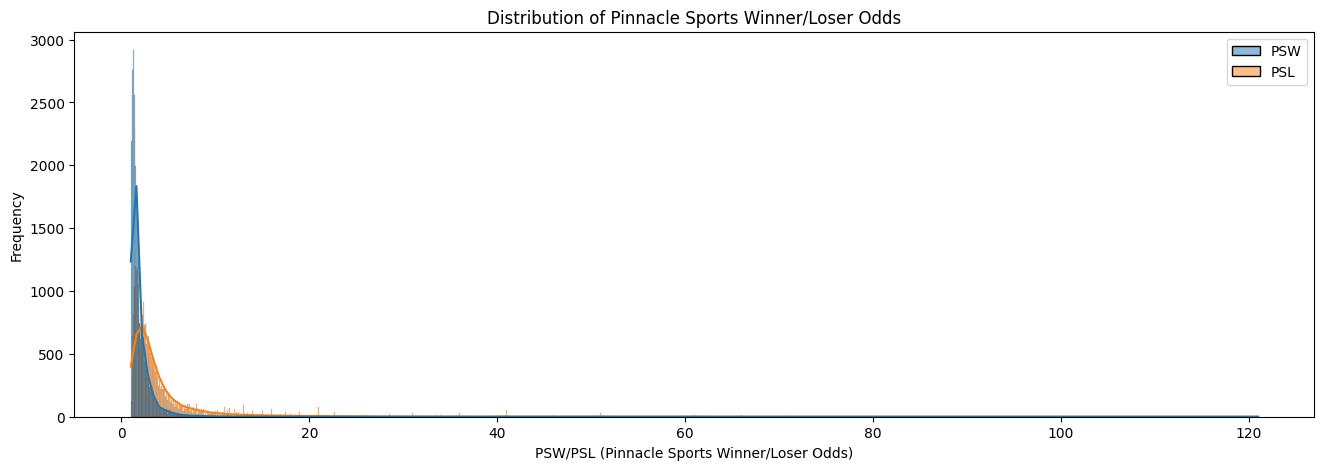

It maxes on 46.0 (for winners) and 121.0 (for losers).


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram of Pinnacle Sports' bets on the the winner
plt.figure(figsize=(16, 5))
sns.histplot(df_atp[["PSW", "PSL"]], kde=True, color=["green", "red"])

# Add labels and title
plt.title('Distribution of Pinnacle Sports Winner/Loser Odds')
plt.xlabel('PSW/PSL (Pinnacle Sports Winner/Loser Odds)')
plt.ylabel('Frequency')

# Show the plot
plt.show()
print(f"They max on {df_atp['PSW'].max()} (for winners) and {df_atp['PSL'].max()} (for losers).")

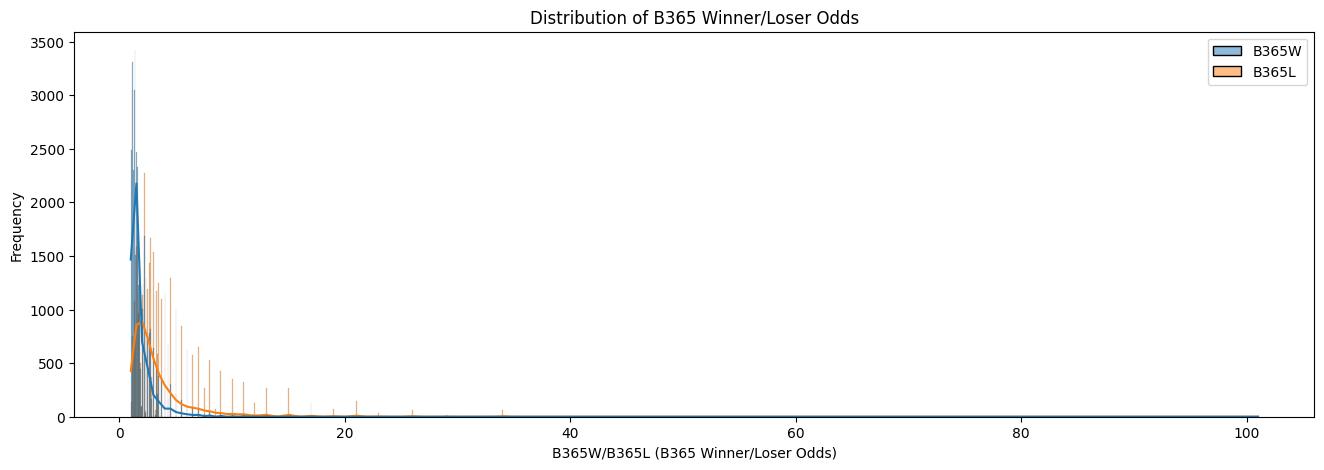

They max on 29.0 (for winners) and 101.0 (for losers).


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram of B365 bets on the the winner
plt.figure(figsize=(16, 5))
sns.histplot(df_atp[["B365W", "B365L"]], kde=True, color=["green", "red"])

# Add labels and title
plt.title('Distribution of B365 Winner/Loser Odds')
plt.xlabel('B365W/B365L (B365 Winner/Loser Odds)')
plt.ylabel('Frequency')

# Show the plot
plt.show()
print(f"They max on {df_atp['B365W'].max()} (for winners) and {df_atp['B365L'].max()} (for losers).")

In [48]:
# How many unique players are on the ATP tours:
players = pd.concat([df_atp['Winner'], df_atp['Loser']]).unique()
print(f"Total number of players apearing in the dataset: {len(players)}")

Total number of players apearing in the dataset: 1402


In [52]:
win_count = df_atp['Winner'].value_counts()

# Count of wins for top 10 players with the most wins
win_count.head(10)

Winner
Federer R.      970
Nadal R.        803
Djokovic N.     687
Ferrer D.       632
Murray A.       560
Roddick A.      538
Berdych T.      524
Verdasco F.     454
Davydenko N.    453
Gasquet R.      450
Name: count, dtype: int64

In [53]:
loss_count = df_atp['Loser'].value_counts()

# Count of Losses for top 10 players with the most losses
loss_count.head(10)

Loser
Lopez F.            369
Youzhny M.          345
Verdasco F.         339
Ferrer D.           325
Nieminen J.         308
Seppi A.            302
Garcia-Lopez G.     299
Davydenko N.        299
Robredo T.          296
Kohlschreiber P.    291
Name: count, dtype: int64

Text(0.5, 1.0, 'Player Wins Bar Plot')

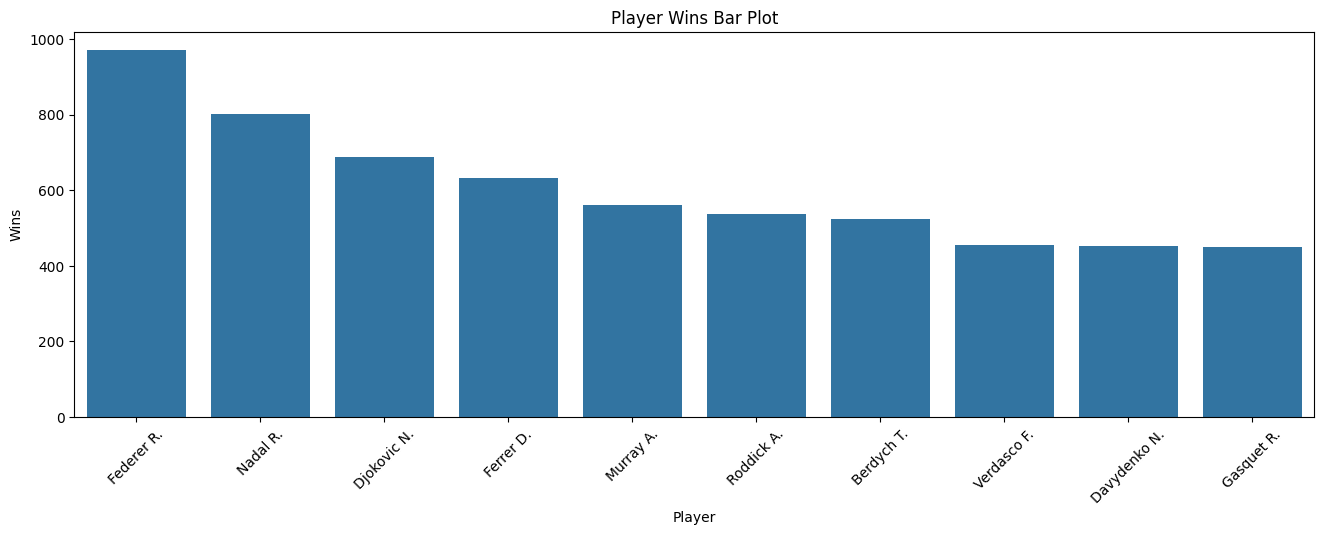

In [57]:
top_n = 10

plt.figure(figsize=(16, 5))
sns.barplot(x=win_count.iloc[:top_n].index, y=win_count.iloc[:top_n].values)

plt.xticks(rotation=45)
plt.xlabel("Player")
plt.ylabel("Wins")
plt.title("Player Wins Bar Plot")

Text(0.5, 1.0, 'Player Losses Bar Plot')

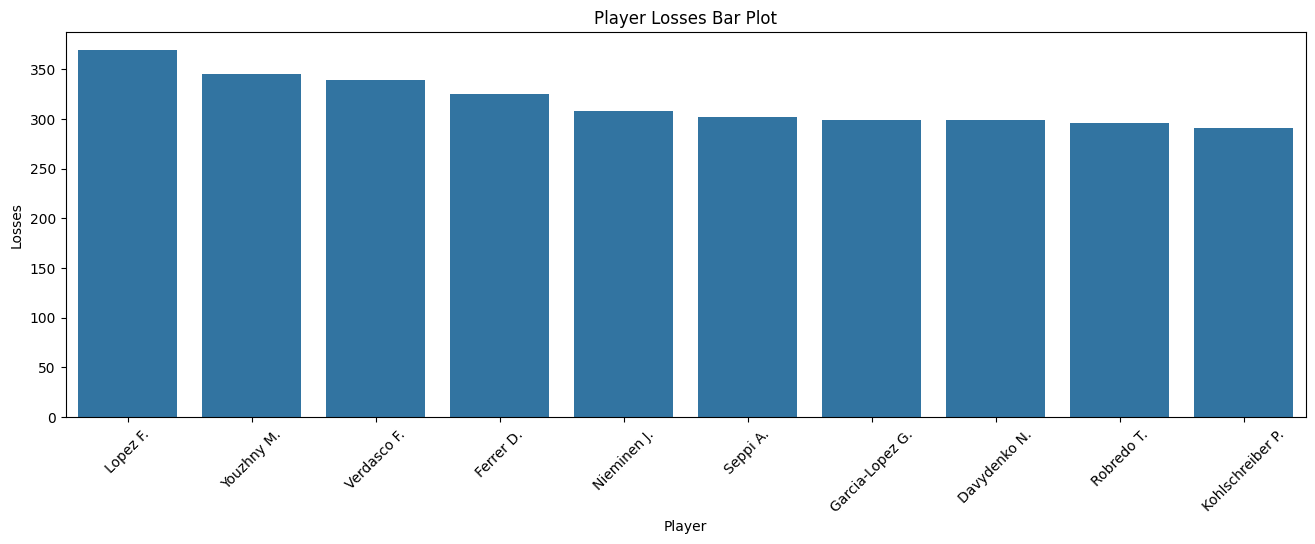

In [59]:
plt.figure(figsize=(16, 5))
sns.barplot(x=loss_count.iloc[:top_n].index, y=loss_count.iloc[:top_n].values)

plt.xticks(rotation=45)
plt.xlabel("Player")
plt.ylabel("Losses")
plt.title("Player Losses Bar Plot")


In [78]:
surface_winner = df_atp[["Winner", "Loser", "Surface"]].groupby(by=["Surface", "Winner"]).size().reset_index(name='count').sort_values(by="count", ascending=False)
carpet_win_count = surface_winner[surface_winner["Surface"]=="Carpet"]
clay_win_count = surface_winner[surface_winner["Surface"]=="Clay"]
grass_win_count = surface_winner[surface_winner["Surface"]=="Grass"]
hard_win_count = surface_winner[surface_winner["Surface"]=="Hard"]

surface_winner.head(20)

,Surface,Winner,count
1473,Hard,Federer R.,606
1437,Hard,Djokovic N.,446
1735,Hard,Nadal R.,388
1821,Hard,Roddick A.,383
1732,Hard,Murray A.,362
610,Clay,Nadal R.,350
1336,Hard,Berdych T.,327
1476,Hard,Ferrer D.,302
386,Clay,Ferrer D.,281
1556,Hard,Hewitt L.,265


In [79]:
carpet_win_count.head(5)

,Surface,Winner,count
163,Carpet,Safin M.,39
120,Carpet,Ljubicic I.,39
204,Carpet,Youzhny M.,38
56,Carpet,Federer R.,37
43,Carpet,Davydenko N.,36


In [80]:
clay_win_count.head(5)

,Surface,Winner,count
610,Clay,Nadal R.,350
386,Clay,Ferrer D.,281
220,Clay,Almagro N.,255
677,Clay,Robredo T.,216
594,Clay,Monaco J.,205


In [81]:
grass_win_count.head(5)

,Surface,Winner,count
960,Grass,Federer R.,140
1123,Grass,Murray A.,89
1015,Grass,Hewitt L.,83
1179,Grass,Roddick A.,77
934,Grass,Djokovic N.,66


In [113]:

# Group by "Winner" and copy the columns 'Wins' and 'elo_prob'
player_wins = df_atp.groupby('Winner').agg({'Surface': 'size', 'proba_elo': 'first'}).reset_index()
player_wins.rename(columns={'Surface': 'Wins'}, inplace=True)

# Sort the DataFrame by the number of wins in descending order and then by elo_prob in ascending order
sorted_players = player_wins.sort_values(by=['Wins', 'proba_elo'], ascending=[False, True])

# Display the sorted DataFrame
print(sorted_players)

                    Winner  Wins  proba_elo
237             Federer R.   970   0.918367
557               Nadal R.   803   0.899467
193            Djokovic N.   687   0.994167
241              Ferrer D.   632   0.926100
554              Murray A.   560   0.886474
667             Roddick A.   538   0.505644
62              Berdych T.   524   0.732481
822            Verdasco F.   454   0.406038
163           Davydenko N.   453   0.854506
273             Gasquet R.   450   0.885432
662             Robredo T.   438   0.571811
874             Youzhny M.   428   0.900534
345              Hewitt L.   424   0.872770
847            Wawrinka S.   408   0.866438
470               Lopez F.   405   0.546742
730               Simon G.   389   0.685819
244           Ferrero J.C.   384   0.890549
799            Tsonga J.W.   374   0.946780
537             Monfils G.   372   0.683831
12              Almagro N.   370   0.912605
135               Cilic M.   364   0.897048
411       Kohlschreiber P.   363

In [118]:
# Filter DataFrame to consider only wins where prob_elo of winner is lower than prob_elo of opponent
filtered_df = df_atp[df_atp['prob_elo'] < df_atp['prob_elo'].shift(-1)]

# Group by "Winner" and "Loser" and aggregate 'Surface' count and 'prob_elo' values
player_wins = filtered_df.groupby(['Winner', 'Loser']).agg({'Surface': 'size', 'prob_elo': list}).reset_index()
player_wins.rename(columns={'Surface': 'Wins'}, inplace=True)

# Find the minimum 'prob_elo' for each player
player_wins['min_prob_elo'] = player_wins['prob_elo'].apply(min)

# Sort the DataFrame by the number of wins in descending order and then by min_prob_elo in ascending order
sorted_players = player_wins.sort_values(by=['Wins', 'min_prob_elo'], ascending=[False, True])

# Display the player with the most wins despite the lowest min_prob_elo and their opponent
best_player = sorted_players.iloc[0]
print(best_player[['Winner', 'Loser', 'Wins', 'min_prob_elo']])

KeyError: 'Loser'